In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
def plotMulti(lst, leaf_lst, treeD_lst, treeA_lst, title):
    
    x_axis = np.arange(len(lst))
    # Multi bar Chart
    plt.bar(x_axis +0.20, leaf_lst, width=0.2, label = 'leaf')
    plt.bar(x_axis +0.20*2, treeD_lst, width=0.2, label = 'tree_sortD')
    plt.bar(x_axis +0.20*3, treeA_lst, width=0.2, label = 'tree_sortA')

    plt.xticks(x_axis,lst)
    plt.legend()
    plt.title(title)
    plt.show()

def plotDPSeperate(T, arrayLeaf, arrayTree_sortSubroot, arrayTree_sortD, xlable, ylable, title):
    xpoints = np.linspace(1, T, T, endpoint=True)
    y1points = arrayLeaf
    y2points = arrayTree_sortSubroot
    y3points = arrayTree_sortD

    #plt.subplot(1, 1, 1)
    plt.plot(xpoints, y1points, 'b^', label="leaf")
    plt.plot(xpoints, y2points, 'r^', label="tree_sortSubRoot")
    plt.plot(xpoints, y3points, 'g^', label="tree_sortD")

    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.legend(loc="upper left", prop={'size': 8})

    plt.title(title)

    plt.show()
    
def plotDP(T, arrayLeaf, arrayTree_sortSubroot, arrayTree_sortD, arrayLeaf_store, arrayTree_sortSubroot_store, arrayTree_sortD_store, xlable, ylable, title):
    xpoints = np.linspace(1, T, T, endpoint=True)
    y1points = arrayLeaf
    y2points = arrayTree_sortSubroot
    y3points = arrayTree_sortD
    
    y4points = arrayLeaf_store
    y5points = arrayTree_sortSubroot_store
    y6points = arrayTree_sortD_store

    #plt.subplot(1, 1, 1)
    plt.plot(xpoints, y1points, 'b^', label="CountDP_leaf")
    plt.plot(xpoints, y2points, 'r^', label="CountDP_tree_sortSubRoot")
    plt.plot(xpoints, y3points, 'g^', label="CountDP_tree_sortD")
    
    plt.plot(xpoints, y4points, 'bv', label="StoreDP_leaf")
    plt.plot(xpoints, y5points, 'rv', label="StoreDP_tree_sortSubRoot")
    plt.plot(xpoints, y6points, 'gv', label="StoreDP_tree_sortD")

    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.legend(loc="upper left", prop={'size': 8})

    plt.title(title)

    plt.show()

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html


def plotSort(T, arrayLeaf, arrayTree_sortSubroot, arrayTree_sortD, xlable, ylable, title):
    xpoints = np.linspace(1, T, T, endpoint=True)
    y1points = arrayLeaf
    y2points = arrayTree_sortSubroot
    y3points = arrayTree_sortD
    
    #plt.subplot(1, 1, 1)
    plt.plot(xpoints, y1points, 'b^', label="SortTime_leaf")
    plt.plot(xpoints, y2points, 'r^', label="SortTime_tree_sortSubRoot")
    plt.plot(xpoints, y3points, 'g^', label="SortTime_tree_sortD")

    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.legend(loc="upper left", prop={'size': 8})

    plt.title(title)

    plt.show()


def plotCache(T, arrayLeaf, arrayTree_sortSubroot, arrayTree_sortD, xlable, ylable, title):
    xpoints = np.linspace(1, T, T, endpoint=True)
    y1points = arrayLeaf
    y2points = arrayTree_sortSubroot
    y3points = arrayTree_sortD
    
    #plt.subplot(1, 1, 1)
    plt.plot(xpoints, y1points, 'b^', label="CacheDummy_leaf")
    plt.plot(xpoints, y2points, 'r^', label="CacheDummy_tree_sortSubRoot")
    plt.plot(xpoints, y3points, 'go', label="CacheDummy_tree_sortD")

    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.legend(loc="upper left", prop={'size': 8})

    plt.title(title)

    plt.show()
    
def plotT(T, eps, N):
    # create file names
    T_string = "T:"+str(T)
    eps_string = ",eps:"+str(eps)
    N_string = ",N:"+str(N)
    fileName = T_string+eps_string+N_string+".json"
    with open(fileName) as data_file:
        data_loaded = json.load(data_file)
            
    # six metrics
        #leaf 
    LeafRunTimeDPSort_mean = data_loaded["list_runTimeDPSort_leaf"]
    LeafDPError_mean = data_loaded["list_metricDPError_leaf"]
    LeafDPStoreError_mean = data_loaded["list_metricDPStoreError_leaf"]
    LeafTTStoreError_mean = data_loaded["list_metricTTStoreError_leaf"]
    LeafCacheNum_mean = data_loaded["list_dummyRecordNumCache_leaf"]
        #tree_sortRoot
    SortRootRunTimeDPSort_mean = data_loaded["list_runTimeDPSort_treeA"]
    SortRootDPError_mean = data_loaded["list_metricDPError_treeA"]
    SortRootDPStoreError_mean = data_loaded["list_metricDPStoreError_treeA"]
    SortRootTTStoreError_mean = data_loaded["list_metricTTStoreError_treeA"]
    SortRootCacheNum_mean = data_loaded["list_dummyRecordNumCache_treeA"]
        #tree_sortD
    SortDRunTimeDPSort_mean = data_loaded["list_runTimeDPSort_treeD"]
    SortDDPError_mean = data_loaded["list_metricDPError_treeD"]
    SortDDPStoreError_mean = data_loaded["list_metricDPStoreError_treeD"]
    SortDTTStoreError_mean = data_loaded["list_metricTTStoreError_treeD"]
    SortDCacheNum_mean = data_loaded["list_dummyRecordNumCache_treeD"]

    title = "T:"+str(T)+"; eps:"+str(eps)+"; N:"+str(N)
    plotSort(T, LeafRunTimeDPSort_mean, SortRootRunTimeDPSort_mean, SortDRunTimeDPSort_mean, "time", "sortTime", title)
    plotDPSeperate(T, LeafDPError_mean, SortRootDPError_mean, SortDDPError_mean, "time", "DPError", title)
    plotDPSeperate(T, LeafTTStoreError_mean, SortRootTTStoreError_mean, SortDTTStoreError_mean, "time", "TrueStoreError", title)
    plotDPSeperate(T, LeafDPStoreError_mean, SortRootDPStoreError_mean, SortDDPStoreError_mean, "time", "DPStoreError", title)

    #  plotCache(T, SortRootCacheNum_mean, SortRootCacheNum_mean, SortDCacheNum_mean, "time", "numOfDummy", title)
    plotCache(T, LeafCacheNum_mean, SortRootCacheNum_mean, SortDCacheNum_mean, "time", "numOfDummy", title)




# create data
def plotStackBarCharRunTime(approachName, xList, xName, UpdateDPTimeTree, DPMerge, SortCacheDP):
    UpdateDPTimeTree = np.array(UpdateDPTimeTree) # milliseconds
    DPMerge = np.array(DPMerge) # microseconds
    SortCacheDP = np.array(SortCacheDP) * 1000 # s --> milliseconds
    # plot bars in stack manner
    plt.bar(xList, UpdateDPTimeTree, color='r')
    plt.bar(xList, DPMerge, bottom=UpdateDPTimeTree, color='b')
    plt.bar(xList, SortCacheDP, bottom=UpdateDPTimeTree+DPMerge, color='y')
    plt.xlabel(xName)
    plt.ylabel("Run Time")
    plt.legend(["UpdateDPTimeTree(millisec)", "DPMerge(microsec*10)", "SortCacheDP(millisec)"], loc='best', fancybox=True, framealpha=0.5)
    plt.title(approachName + ": Run Time by " + xName + " in three components")
    plt.show()
    
def plotStackBarCharAccuracy(approachName, xList, xName, DPError, DPStoreError, TTStoreError):
    DPError = np.array(DPError) 
    DPStoreError = np.array(DPStoreError)  
    TTStoreError = np.array(TTStoreError)  
    # plot bars in stack manner
    plt.bar(xList, DPError, color='r')
    plt.bar(xList, DPStoreError, bottom=DPError, color='b')
    plt.bar(xList, TTStoreError, bottom=DPError+DPStoreError, color='y')
    plt.xlabel(xName)
    plt.ylabel("Accuracy")
    plt.legend(["DPError", "DPStoreError", "TTStoreError"], loc='best', fancybox=True, framealpha=0.5)
    plt.title(approachName + ": Accuracy by " + xName + " in three metrics")
    plt.show()


def plotNorEps(p1, p2, p3, NorEps): #eps: T, N, epsList or N: T, eps, NList
    T = p1
    if NorEps == "eps":
        size = len(p3)
        epsList = p3
        N = p2
    else:
        size = len(p3)
        NList = p3
        eps = p2
        
    LeafRunTimeDP_list = [None]*size
    LeafRunTimeDPSort_list = [None]*size
    LeafRunTimeDPMerge_list = [None]*size
    LeafDPError_list = [None]*size
    LeafDPStoreError_list = [None]*size
    LeafTTStoreError_list = [None]*size
    
    SortRootRunTimeDP_list = [None]*size
    SortRootRunTimeDPSort_list = [None]*size
    SortRootRunTimeDPMerge_list = [None]*size
    SortRootDPError_list = [None]*size
    SortRootDPStoreError_list = [None]*size
    SortRootTTStoreError_list = [None]*size
    
    SortDRunTimeDP_list = [None]*size
    SortDRunTimeDPSort_list = [None]*size
    SortDRunTimeDPMerge_list = [None]*size
    SortDDPError_list = [None]*size
    SortDDPStoreError_list = [None]*size
    SortDTTStoreError_list = [None]*size
    # create file names
    for i in range(size):
        T_string = "T:"+str(T)
        if NorEps == "eps":
            eps_string = ",eps:"+str(p3[i])
            N_string = ",N:"+str(N)
        else:
            eps_string = ",eps:"+str(eps)
            N_string = ",N:"+str(p3[i])
        
        fileName = T_string+eps_string+N_string+".json"
        with open(fileName) as data_file:
            data_loaded = json.load(data_file)

        
        # six metrics
            #leaf 
        LeafRunTimeDPSort_list[i] = sum(data_loaded["list_runTimeDPSort_leaf"])
        LeafDPError_list[i] = sum(data_loaded["list_metricDPError_leaf"])
        LeafDPStoreError_list[i] = sum(data_loaded["list_metricDPStoreError_leaf"])
        LeafTTStoreError_list[i] = sum(data_loaded["list_metricTTStoreError_leaf"])
            #tree_sortRoot
        SortRootRunTimeDPSort_list[i] = sum(data_loaded["list_runTimeDPSort_treeA"])
        SortRootDPError_list[i] = sum(data_loaded["list_metricDPError_treeA"])
        SortRootDPStoreError_list[i] = sum(data_loaded["list_metricDPStoreError_treeA"])
        SortRootTTStoreError_list[i] = sum(data_loaded["list_metricTTStoreError_treeA"])
            #tree_sortD
        SortDRunTimeDPSort_list[i] = sum(data_loaded["list_runTimeDPSort_treeD"])
        SortDDPError_list[i] = sum(data_loaded["list_metricDPError_treeD"])
        SortDDPStoreError_list[i] = sum(data_loaded["list_metricDPStoreError_treeD"])
        SortDTTStoreError_list[i] = sum(data_loaded["list_metricTTStoreError_treeD"])
      #  print("SortRootRunTimeDPSort", returnedMeanSortRoot["metricRunTimeDPSort_mean"])
      #  print("SortDRunTimeDPSort_list", returnedMeanSortD["metricRunTimeDPSort_mean"])
      #  print("SortRootRunTimeDPSort", sum(returnedMeanSortRoot["metricRunTimeDPSort_mean"]))
      #  print("SortDRunTimeDPSort_list", sum(returnedMeanSortD["metricRunTimeDPSort_mean"]))

        
    xList = [str(x) for x in p3]
    
    #sortTime
    plotMulti(xList, LeafRunTimeDPSort_list, SortDRunTimeDPSort_list, SortRootRunTimeDPSort_list, "SortTime--varying "+NorEps)

    # accuracy 
    plotMulti(xList, LeafDPError_list, SortDDPError_list, SortRootDPError_list, "DPCountError--varying "+NorEps)
    plotMulti(xList, LeafDPStoreError_list, SortDDPStoreError_list, SortRootDPStoreError_list, "DPStoreError--varying "+NorEps)
    plotMulti(xList, LeafTTStoreError_list, SortDTTStoreError_list, SortRootTTStoreError_list, "TTStoreError--varying "+NorEps)


In [3]:
#import sys; sys.path.insert(0, '.')  
#from plot_functions2 import plotT, plotNorEps

********************************************************************************
T: 1000, N: 1000, varying eps in [10, 1]


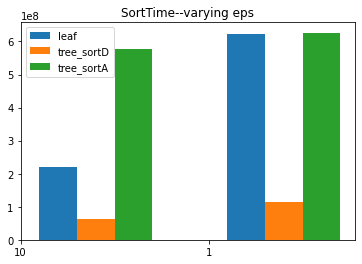

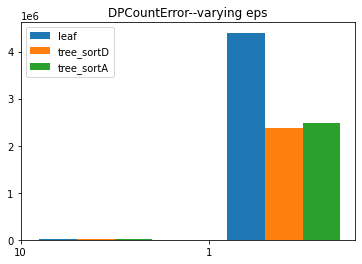

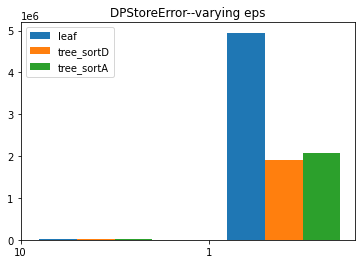

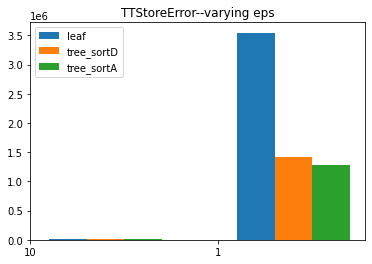

********************************************************************************
T: 1000, N: 10000, varying eps in [10, 1]


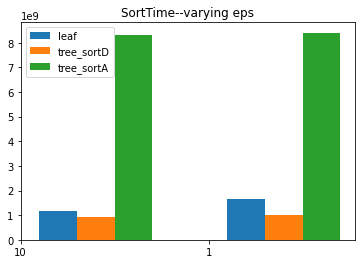

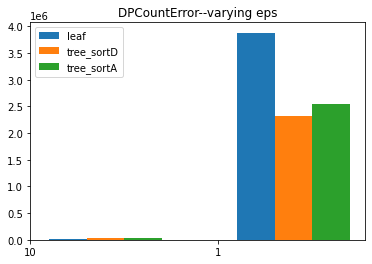

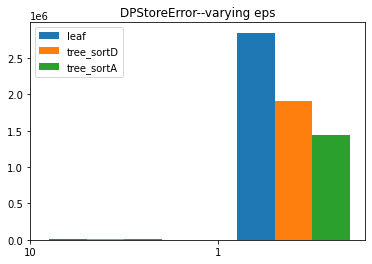

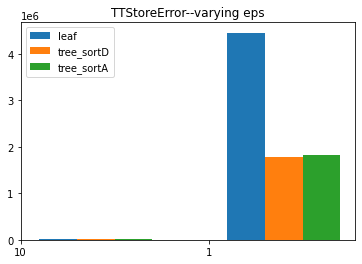

In [4]:
# runtime and accuracy
#print("********************************************************************************")
#print("T: 10, N: 100, varying eps in [10, 1, 0.1]")
#plotNorEps(10, 100, [10, 1, 0.1], "eps")  # T, N, epsList
print("********************************************************************************")
print("T: 1000, N: 1000, varying eps in [10, 1]")
plotNorEps(1000, 1000, [10, 1], "eps")  # T, N, epsList
print("********************************************************************************")
print("T: 1000, N: 10000, varying eps in [10, 1]")
plotNorEps(1000, 10000, [10, 1], "eps")  # T, N, epsList

T: 1000, eps: 10, varying N in [1000, 10000]


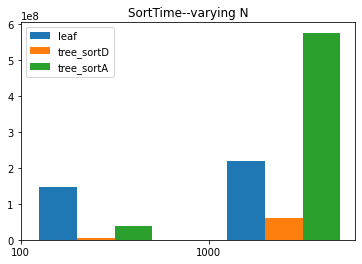

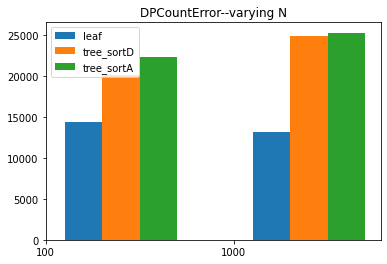

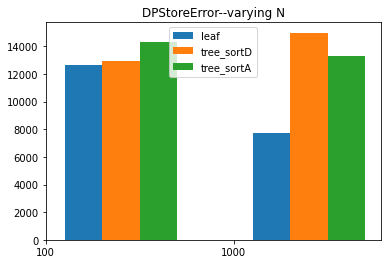

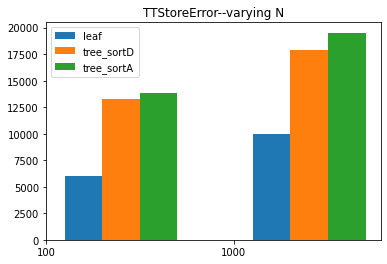

********************************************************************************
T: 1000, eps: 1, varying N in [1000, 10000]


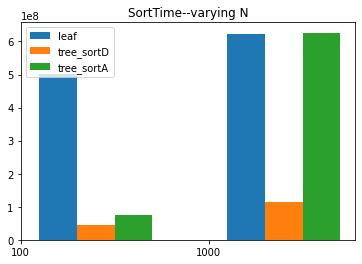

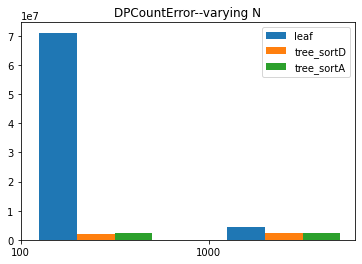

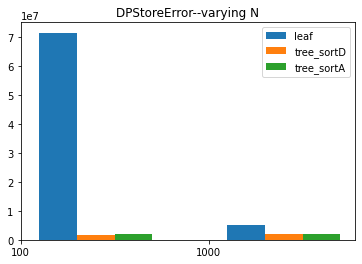

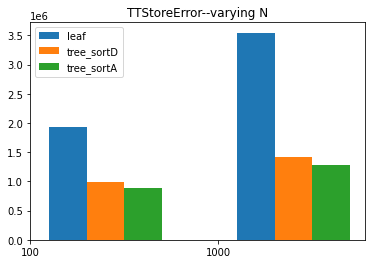

********************************************************************************
T: 10, eps: 0.1, varying N in [100, 1000, 10000]


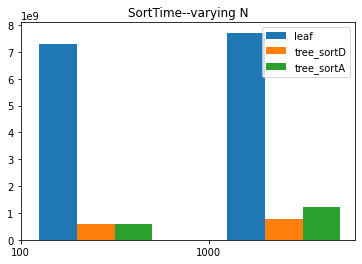

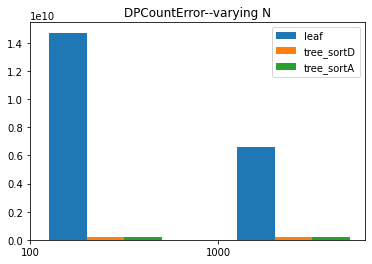

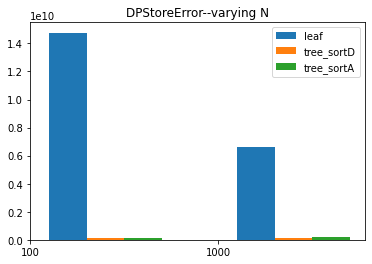

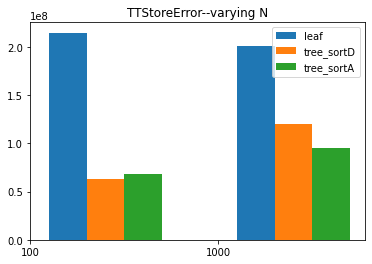

In [5]:
#print("********************************************************************************")
print("T: 1000, eps: 10, varying N in [1000, 10000]")
plotNorEps(1000, 10, [100, 1000], "N")  # T, eps, NList
print("********************************************************************************")
print("T: 1000, eps: 1, varying N in [1000, 10000]")
plotNorEps(1000, 1, [ 100, 1000], "N")  # T, eps, NList
print("********************************************************************************")
print("T: 10, eps: 0.1, varying N in [100, 1000, 10000]")
plotNorEps(1000, 0.1, [100, 1000], "N")  # T, eps, NList




T: 1000, eps: 10, varying N in [1000, 10000]


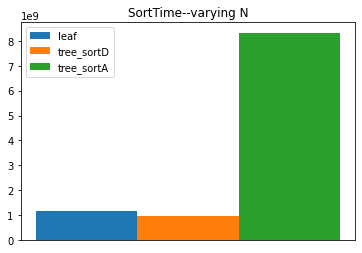

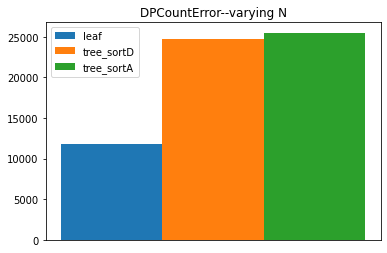

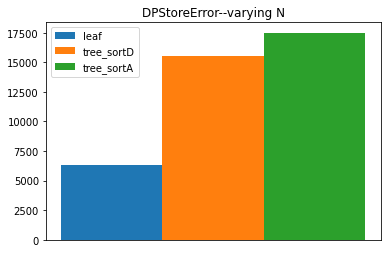

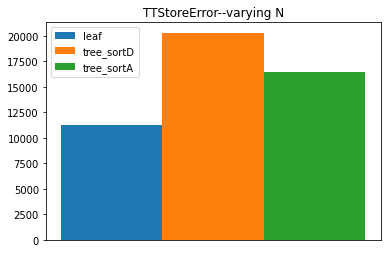

********************************************************************************
T: 1000, eps: 1, varying N in [1000, 10000]


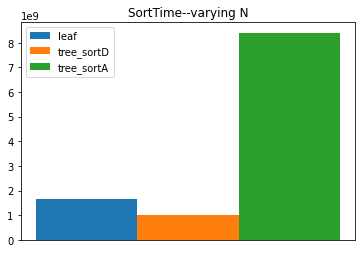

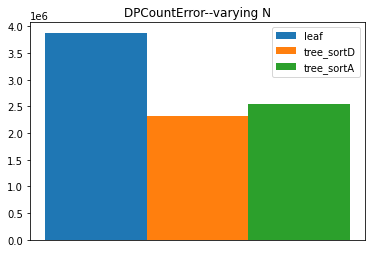

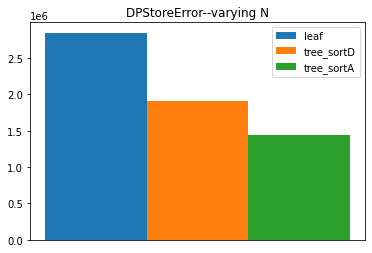

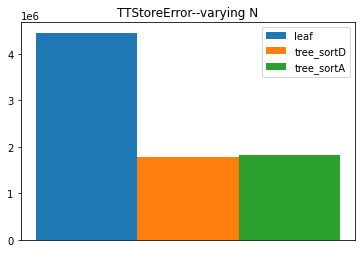

In [6]:
#print("********************************************************************************")
print("T: 1000, eps: 10, varying N in [1000, 10000]")
plotNorEps(1000, 10, [10000], "N")  # T, eps, NList
print("********************************************************************************")
print("T: 1000, eps: 1, varying N in [1000, 10000]")
plotNorEps(1000, 1, [10000], "N")# T, eps, NList



***************************************************************


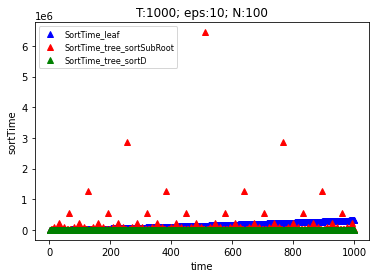

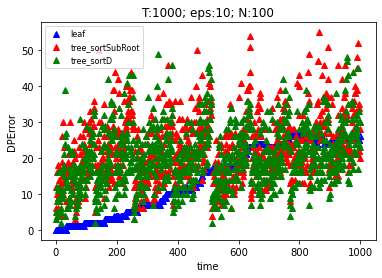

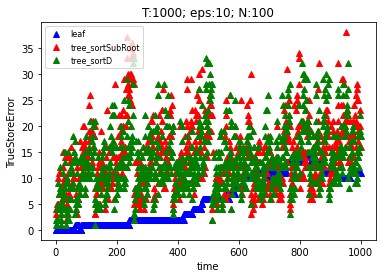

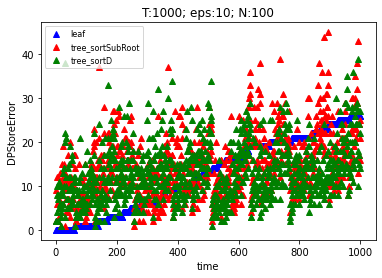

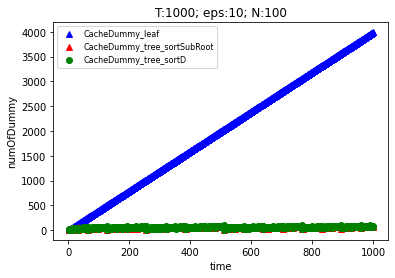

***************************************************************


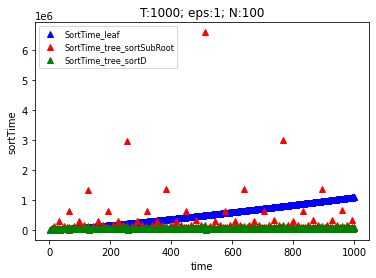

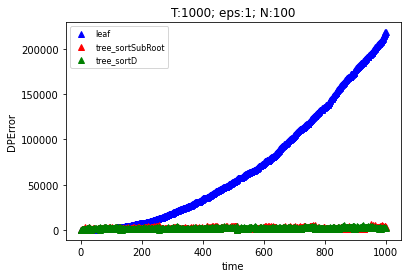

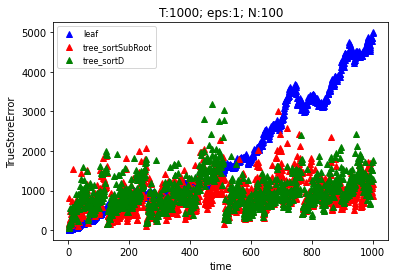

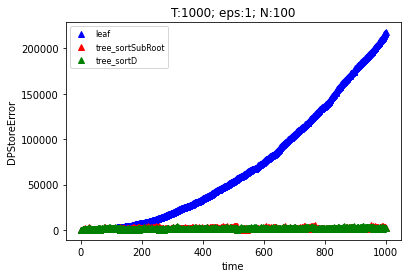

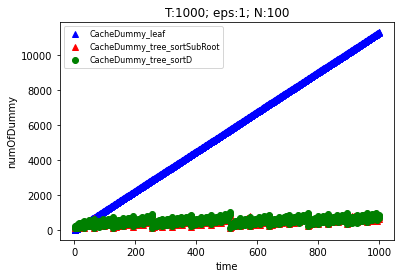

***************************************************************


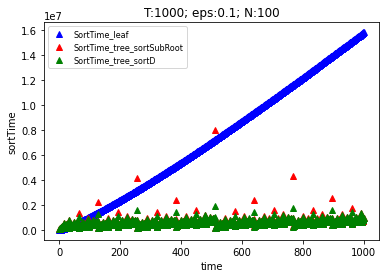

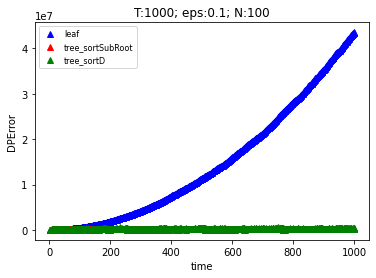

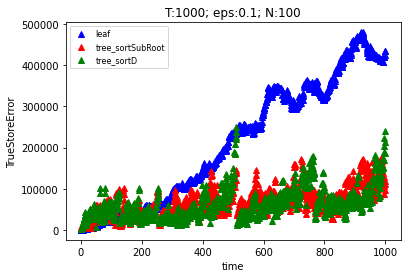

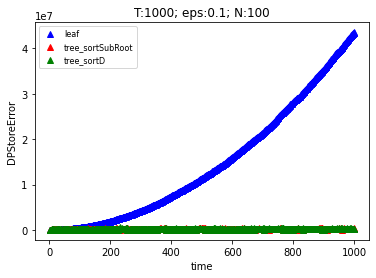

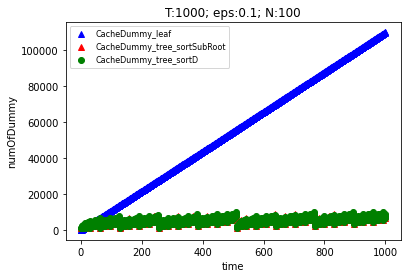

***************************************************************


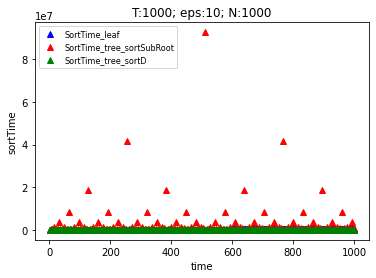

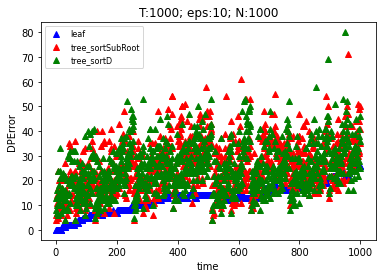

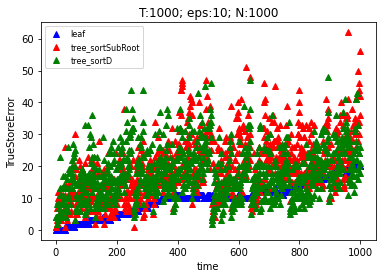

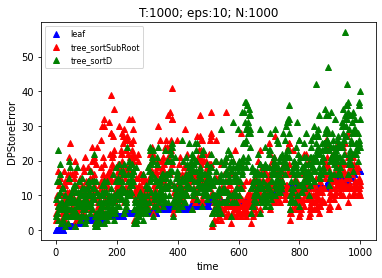

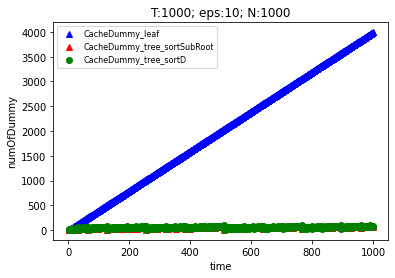

***************************************************************


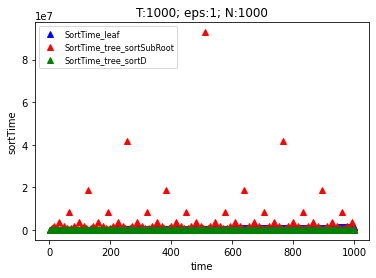

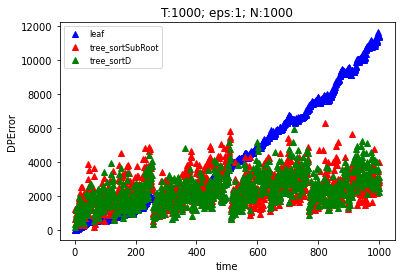

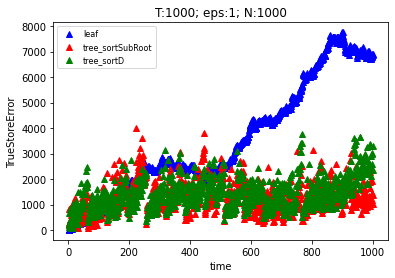

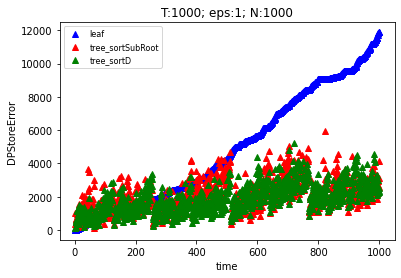

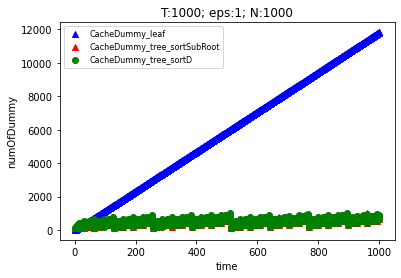

***************************************************************


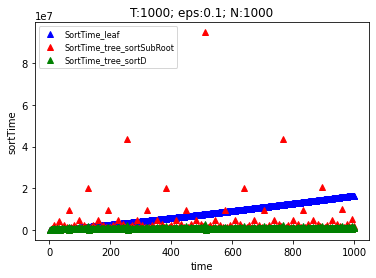

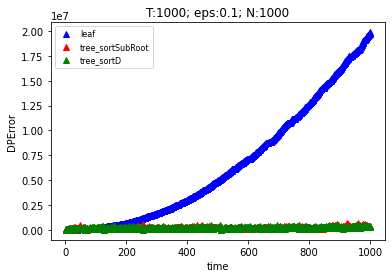

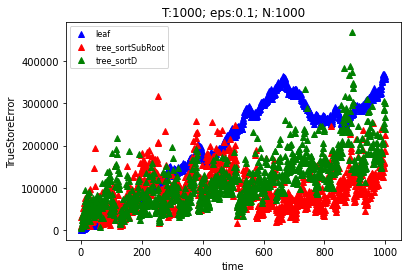

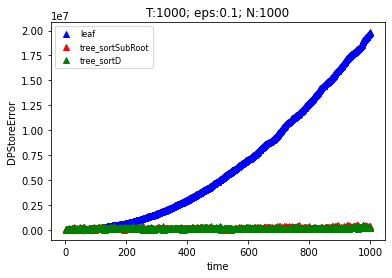

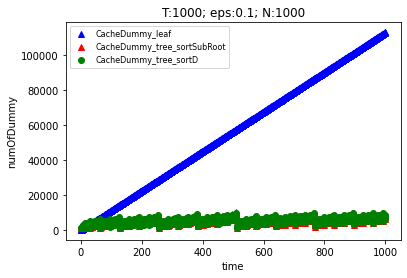

In [7]:
#T:10; eps:10, 1, 0.1; N:1000
T_list = [1000]
eps_list = [10, 1, 0.1]
N_list = [100, 1000]

for T in T_list:
    for N in N_list:
        for eps in eps_list:
            print("***************************************************************")
            plotT(T, eps, N)

***************************************************************


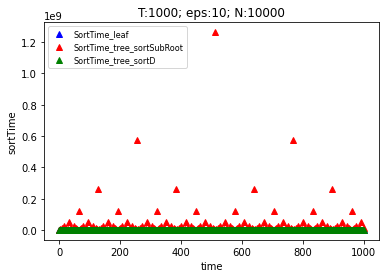

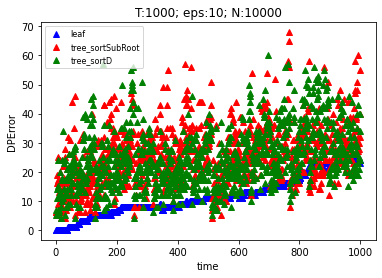

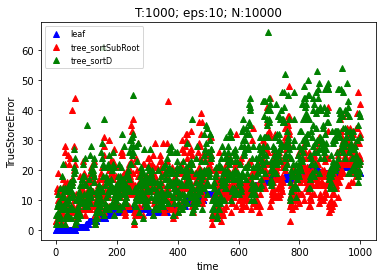

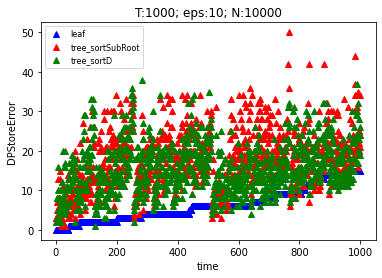

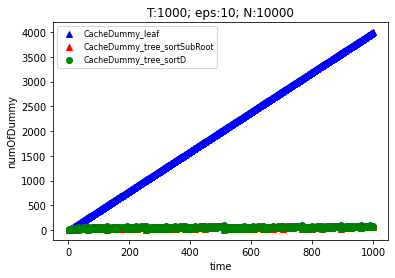

***************************************************************


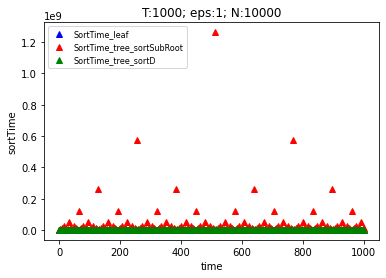

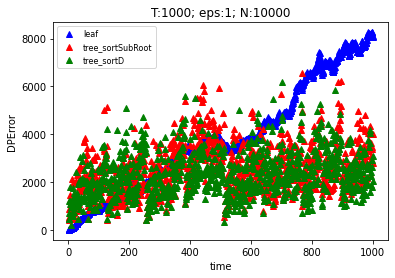

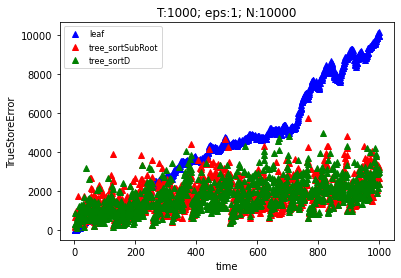

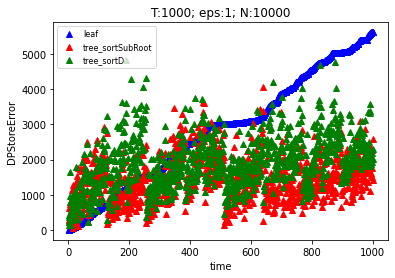

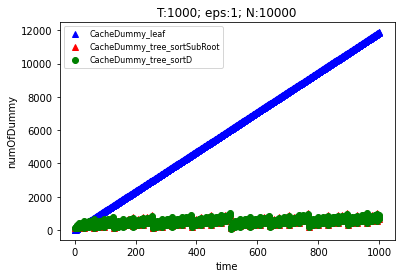

In [8]:
#T:10; eps:10, 1, 0.1; N:1000
T_list = [1000]
eps_list = [10, 1]
N_list = [10000]

for T in T_list:
    for N in N_list:
        for eps in eps_list:
            print("***************************************************************")
            plotT(T, eps, N)




In [9]:
sum([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0])

4712.0